<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Входное-описание-проекта" data-toc-modified-id="Входное-описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Входное описание проекта</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-обзору-данных" data-toc-modified-id="Вывод-по-обзору-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод по обзору данных</a></span></li></ul></li><li><span><a href="#Распределение-и-корреляция" data-toc-modified-id="Распределение-и-корреляция-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Распределение и корреляция</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-распределению-и-корреляции" data-toc-modified-id="Вывод-по-распределению-и-корреляции-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод по распределению и корреляции</a></span></li></ul></li><li><span><a href="#Обучение-и-выбор-модели" data-toc-modified-id="Обучение-и-выбор-модели-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение и выбор модели</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-модели" data-toc-modified-id="Вывод-по-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод по модели</a></span></li></ul></li><li><span><a href="#Кластеризация" data-toc-modified-id="Кластеризация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Кластеризация</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-кластеризации" data-toc-modified-id="Вывод-по-кластеризации-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по кластеризации</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Входное описание проекта

**Описание проекта**

---
Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. Задача — провести анализ и подготовить план действий по удержанию клиентов.

**Направление исследования**

---
- научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;


- сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;



- проанализировать основные признаки, наиболее сильно влияющие на отток;



- сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:


            1) выделить целевые группы клиентов;
            2) предложить меры по снижению оттока;
            3) определить другие особенности взаимодействия с клиентами.

**Описание данных**

---

Таблица **gym_churn** (/datasets/gym_churn.csv) 

- <code class="code-inline code-inline_theme_light">gender</code> — пол;


- <code class="code-inline code-inline_theme_light">Near_Location</code> — проживание или работа в районе, где находится фитнес-центр;


- <code class="code-inline code-inline_theme_light">Partner</code> — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);


- <code class="code-inline code-inline_theme_light">Promo_friends</code> — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);


- <code class="code-inline code-inline_theme_light">Phone</code> — наличие контактного телефона;


- <code class="code-inline code-inline_theme_light">Age</code> — возраст;


- <code class="code-inline code-inline_theme_light">Lifetime</code> — время с момента первого обращения в фитнес-центр (в месяцах);


*Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:*


- <code class="code-inline code-inline_theme_light">Contract_period</code> — длительность текущего действующего абонемента (месяц, 6 месяцев, год);


- <code class="code-inline code-inline_theme_light">Month_to_end_contract</code> — срок до окончания текущего действующего абонемента (в месяцах);


- <code class="code-inline code-inline_theme_light">Group_visits</code> — факт посещения групповых занятий;


- <code class="code-inline code-inline_theme_light">Avg_class_frequency_total</code> — средняя частота посещений в неделю за все время с начала действия абонемента;


- <code class="code-inline code-inline_theme_light">Avg_class_frequency_current_month</code> — средняя частота посещений в неделю за предыдущий месяц;


- <code class="code-inline code-inline_theme_light">'Avg_additional_charges_total'</code> — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон;


- <code class="code-inline code-inline_theme_light">Churn</code> — факт оттока в текущем месяце;


In [104]:
pip install cowsay

In [105]:
import cowsay
cowsay.cow('Хорошего дня тебе, ревьюер')

  __________________________
| Хорошего дня тебе, ревьюер |
                          \
                           \
                             ^__^
                             (oo)\_______
                             (__)\       )\/\
                                 ||----w |
                                 ||     ||


In [106]:
import numpy as np # импортируем библиотеки 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from termcolor import colored, cprint
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import plotly.express as px
from plotly import graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [107]:
try:
    gym = pd.read_csv(
        '/datasets/gym_churn.csv'
)
    
except:
    gym = pd.read_csv(
        'C:\\Users\\HP\\datasets\\МО\\gym_churn.csv'
)

In [108]:
def get_info(df):
    '''
    Выводит первичный обзор датафрейма
    '''
    cprint('Обзор таблицы', 'magenta', attrs=['underline'])
    display(df.head(5))
    cprint('*'*100, 'yellow')
    cprint('Информация о таблице', 'magenta', attrs=['underline'])
    df.info()
    cprint('*'*100, 'yellow')
    cprint('Кол-во строк и столбцов:', 'magenta', attrs=['underline'])
    print(df.shape)
    cprint('*'*100, 'yellow')
    cprint('Кол-во пропусков:', 'magenta', attrs=['underline'])
    display(df.isna().sum())
    cprint('*'*100, 'yellow')
    cprint('Кол-во дубликатов:', 'magenta', attrs=['underline'])
    print(df.duplicated().sum())
    df.columns = df.columns.str.lower()

In [109]:
get_info(gym)

Обзор таблицы


gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_frequency_current_month  \
0         3                   0.020398                           0.000000   
1         7                   1.922936                           1.910244   
2         2                   1.859098                           1.736502   
3         2                   3.205633                           3.357215   
4         3                   1.113884                           1.120078   

   Churn  
0      0  
1      0  
2      0  
3      0  
4      0

****************************************************************************************************
Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

****************************************************************************************************
Кол-во дубликатов:
0


> Пропусков, явных дубликатов - нет, типы менять, на первый взгляд, не нужно, названия столбцов привели к змеиному регистру 

In [110]:
gym.describe(percentiles=[0.75, 0.9, 0.95, 0.99])

gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
90%       1.000000       1.000000     1.000000       1.000000     1.000000   
95%       1.000000       1.000000     1.000000       1.000000     1.000000   
99%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
50%           1.000000      0.000000    29.000000   
75%           6.000000      1.000000    31.000000   
90%          12.000000      1.000000    33.000000   
95%          12.000000      1.000000    34.000000   
99%          12.000000      1.000000    37.000000   
max          12.000000      1.000000    41.000000   

       avg_additional_charges_total  month_to_end_contract     lifetime  \
count                   4000.000000            4000.000000  4000.000000   
mean                     146.943728               4.322750     3.724750   
std                       96.355602               4.191297     3.749267   
min                        0.148205               1.000000     0.000000   
50%                      136.220159               1.000000     3.000000   
75%                      210.949625               6.000000     5.000000   
90%                      277.717199              12.000000     9.000000   
95%                      323.440876              12.000000    11.000000   
99%                      400.996125              12.000000    17.000000   
max                      552.590740              12.000000    31.000000   

       avg_class_frequency_total  avg_class_frequency_current_month  \
count                4000.000000                        4000.000000   
mean                    1.879020                           1.767052   
std                     0.972245                           1.052906   
min                     0.000000                           0.000000   
50%                     1.832768                           1.719574   
75%                     2.536078                           2.510336   
90%                     3.173943                           3.174538   
95%                     3.535648                           3.549062   
99%                     4.197579                           4.185758   
max                     6.023668                           6.146783   

             churn  
count  4000.000000  
mean      0.265250  
std       0.441521  
min       0.000000  
50%       0.000000  
75%       1.000000  
90%       1.000000  
95%       1.000000  
99%       1.000000  
max       1.000000

> Большинство столбцов содержат, по существу, категориальные значения, а значит нет смысла искать в них выбросы и тд, в столбце avg_additional_charges_total и lifetime выбросами можно признать значения выше 99% (400 и 17 соответственно), однако это самые лучшие клиенты и, так как нам нужно будет провести кластеризацию, на них было бы полезно сосредоточиться

In [111]:
cprint('Оставшиеся и ушедшие пользователи:', 'magenta', attrs=['underline'])
print('Кол-во ушедших: {} \nКол-во оставшихся: {} \nОтношение ушедших к оставшимся: {}%'.format(len(gym.query('churn == 0')),
                                                                                                len(gym.query('churn == 1')),
                                                round(len(gym.query('churn == 1')) / len(gym.query('churn == 0')) * 100, 2)))
print()
cprint('Сравнение оставшихся и ушедших пользователей:', 'magenta', attrs=['underline'])
gym.groupby('churn').mean()

Оставшиеся и ушедшие пользователи:
Кол-во ушедших: 2939 
Кол-во оставшихся: 1061 
Отношение ушедших к оставшимся: 36.1%

Сравнение оставшихся и ушедших пользователей:


gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.027882  
1                               1.044546

## Вывод по обзору данных

**Вывод**

---
- Поскольку выбранный признак распределён неравномерно, то на метрику accuracy можно обращать меньше внимания. 


- Отток почти не зависит от гендера, факта оставления телефона


- Для остальных параметров характерно - чем меньше значение параметра - тем выше отток (обратная корреляция)

# Распределение и корреляция

In [112]:
# посмотрим на распределения в столбах со значениями не 1 или 0
list_col = gym.drop(['churn', 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits'], axis=1).columns

for i in list_col:
    fig = px.histogram(gym, x=i, color='churn', marginal="box")
    fig.update_layout(
    title_text='Гистограмма для признака ' + i, # title of plot
    xaxis_title_text=i, # xaxis label
    yaxis_title_text='Count', # yaxis label
    bargap=0.2, # gap between bars of adjacent location coordinates
    bargroupgap=0.1 # gap between bars of the same location coordinates
    )
    fig.show()

**Вывод**

---
- По возрасту: больше всего клиентов в возрасте 30-31, основной диапазон значений от 25-35, больше всего оттока в промежутке от 24 до 29 (распределение нормальное)


- Для параметра avg_additional_charges_total заметно, что уровень оттока снижается почти до нуля после 300 потраченных едениц, те кто не уходит - платят больше (скорее всего просто проводят больше времени, либо настроены более серьезно) от 74-224 против 50-165 (основные диапазоны значений)


- По сроку до окончания текущего действующего абонемента результаты предсказуемы - хотя отток и случается когда в абонементе остается еще 4-6 месяцев, все основная масса оттока приходи на один месяц до конца абонемента


- В срезе лайфтайма любопытен своеобразный порог оставшихся (можно использовать в рекламной компании) особенно при посещении от двух месяцев - "С каждым месяцем в зале шанса того, что вы забросите снижается" (возможно и недели)


- Средняя частота посещений в неделю за все время включает в себя активный отток до 3 раз посещения в неделю (отток после 3 раз снижается до минимальных значений, от 4 почти отсутствует), основной риск оттока от 1 до 2.4 посещений (примечательно, что при нуле отток не такой уж и большой)


- По средней частоте посещений в неделю за предыдущий месяц результаты похожи на предыдущий пункт, однако здесь ноль подразумевает очень вероятный отток, а основной риск оттока при значениях от нуля до 1.9

In [113]:
cm = gym.corr()
cm = np.around(cm, decimals=2)
fig = px.imshow(cm, 
                text_auto=True,
                aspect="auto",
                labels=dict(x="Признаки", y="Признаки", color="Уровень корреляции"),
                color_continuous_scale='Viridis',
                width=970, height=600)
fig.update_layout(
    title_text = 'Матрица корреляции')
fig.show()

> Видим мультиколлинеарные признаки: avg_class_frequency_current_month - avg_class_frequency_total и contract_period - month_to_end_contract. Необходимо учитывать их при обучении модели. По корреляции с оттоком выводы выше подтверждаются

## Вывод по распределению и корреляции

**Вывод**

---
- По возрасту: больше всего клиентов в возрасте 30-31, основной диапазон значений от 25-35, больше всего оттока в промежутке от 24 до 29 (распределение нормальное)


- Для параметра avg_additional_charges_total заметно, что уровень оттока снижается почти до нуля после 300 потраченных едениц, те кто не уходит - платят больше (скорее всего просто проводят больше времени, либо настроены более серьезно) от 74-224 против 50-165 (основные диапазоны значений)


- По сроку до окончания текущего действующего абонемента результаты предсказуемы - хотя отток и случается когда в абонементе остается еще 4-6 месяцев, все основная масса оттока приходи на один месяц до конца абонемента


- В срезе лайфтайма любопытен своеобразный порог оставшихся (можно использовать в рекламной компании) особенно при посещении от двух месяцев - "С каждым месяцем в зале шанса того, что вы забросите снижается" (возможно и недели)


- Средняя частота посещений в неделю за все время включает в себя активный отток до 3 раз посещения в неделю (отток после 3 раз снижается до минимальных значений, от 4 почти отсутствует), основной риск оттока от 1 до 2.4 посещений (примечательно, что при нуле отток не такой уж и большой)


- По средней частоте посещений в неделю за предыдущий месяц результаты похожи на предыдущий пункт, однако здесь ноль подразумевает очень вероятный отток, а основной риск оттока при значениях от нуля до 1.9


- По корреляции. Видим мультиколлинеарные признаки: avg_class_frequency_current_month - avg_class_frequency_total и contract_period - month_to_end_contract. Необходимо учитывать их при обучении модели. По корреляции с оттоком выводы выше подтверждаются

# Обучение и выбор модели

In [114]:
def make_prediction(m, X_train, y_train, X_test, y_test):
    model = m
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    probabilities = model.predict_proba(X_test)[:, 1]
    print(
        'Accuracy: {:.2f} Precision: {:.2f} Recall: {:.2f} F1: {:.2f} ROC_AUC: {:.2f}'.format(
            accuracy_score(y_test, y_pred),
            precision_score(y_test, y_pred),
            recall_score(y_test, y_pred),
            f1_score(y_test, y_pred),
            roc_auc_score(y_test, probabilities)
        )
    )

In [115]:
X = gym.drop(['churn', 'avg_class_frequency_total', 'contract_period'], axis = 1)
y = gym['churn']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0, stratify=y
)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

models = [
    LogisticRegression(solver='liblinear', random_state=0),
    RandomForestClassifier(random_state=0)
]


for i in models:
    cprint('Метрики для модели:', 'magenta', attrs=['underline'])
    print(i)
    make_prediction(i, X_train, y_train, X_test, y_test)

Метрики для модели:
LogisticRegression(random_state=0, solver='liblinear')
Accuracy: 0.92 Precision: 0.85 Recall: 0.83 F1: 0.84 ROC_AUC: 0.97
Метрики для модели:
RandomForestClassifier(random_state=0)
Accuracy: 0.91 Precision: 0.85 Recall: 0.80 F1: 0.82 ROC_AUC: 0.96


## Вывод по модели

**Вывод**

---
- Метрики для модели: LogisticRegression - Accuracy: 0.92 Precision: 0.85 Recall: 0.83 F1: 0.84 ROC_AUC: 0.97


- Метрики для модели: RandomForestClassifier - Accuracy: 0.91 Precision: 0.85 Recall: 0.80 F1: 0.82 ROC_AUC: 0.96

>*Так как Accuracy в данном случаем не очень подходит (классы разбалансированны), а каждый факт 1 в параметре оттока это потеря денег для финтес центра, то примем за оснавные метрики Precision (точное предсказание целевой переменной - 1) и Recall (кол-во реально обнаруженных значений целевой переменной), остальные метрики будем использовать в качестве вспомогательных*

Логистическая регрессия показывает лучший результат (все метрики, кроме Precision, немного выше), однако и модель случайный лес тоже демонстрирует хорошие результаты

# Кластеризация

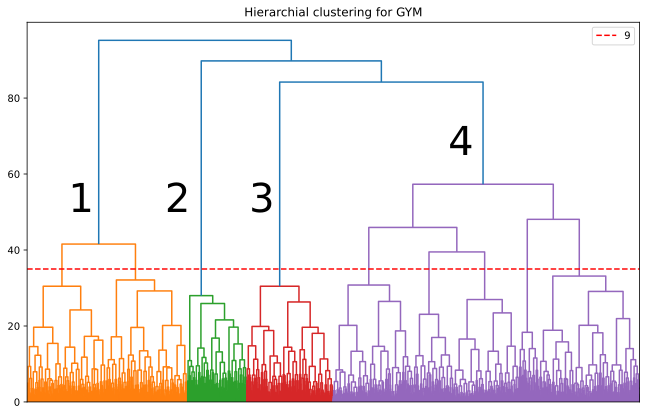

In [116]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(11, 7))  
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchial clustering for GYM')
plt.text(2700, 50, '1', fontsize=40)
plt.text(9000, 50, '2', fontsize=40)
plt.text(14500, 50, '3', fontsize=40)
plt.text(27500, 65, '4', fontsize=40)
plt.axhline(y=35, xmin=0, xmax=1, color='red', label='9n', linestyle='dashed', linewidth=1.5)
plt.legend(labels = '9')
plt.show() 

> Дендрограмма отчетливо показывает 4 кластера, однако можем выделить ещё как минимум два - расходящихся от 4 кластера, также можем выделить 9 кластеров

In [117]:
km = KMeans(n_clusters=5, random_state=0) 
labels = km.fit_predict(X_sc)

gym['cluster_km'] = labels

cprint('Средние значения признаков по кластерам:', 'magenta', attrs=['underline'])
display(gym.groupby('cluster_km').mean())
print()
# Смотрим на метрику силуэта
cprint('Значение silhouette score:', 'magenta', attrs=['underline'])
print('Silhouette_score: {:.2f}'.format(silhouette_score(X_sc, labels)))

Средние значения признаков по кластерам:


gender  near_location   partner  promo_friends     phone  \
cluster_km                                                               
0           0.492000       0.994000  0.953000       1.000000  0.906000   
1           0.495352       0.998672  0.378486       0.046481  0.903054   
2           0.511194       1.000000  0.226368       0.114428  0.899254   
3           0.502455       0.000000  0.489362       0.072013  0.913257   
4           0.550481       0.998798  0.274038       0.075721  0.897837   

            contract_period  group_visits        age  \
cluster_km                                             
0                  7.346000      0.528000  29.633000   
1                  5.059761      0.000000  30.342629   
2                  1.802239      0.182836  26.807214   
3                  2.996727      0.232406  28.700491   
4                  5.155048      1.000000  30.248798   

            avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster_km                                                                  
0                             154.086252               6.730000  4.287000   
1                             174.392898               4.698539  5.166003   
2                             111.073289               1.715174  1.420398   
3                             137.375245               2.826514  3.027823   
4                             155.206260               4.707933  4.483173   

            avg_class_frequency_total  avg_class_frequency_current_month  \
cluster_km                                                                 
0                            1.960141                           1.919105   
1                            2.240956                           2.237272   
2                            1.327204                           0.978977   
3                            1.768079                           1.599583   
4                            2.068666                           2.043261   

               churn  
cluster_km            
0           0.108000  
1           0.046481  
2           0.741294  
3           0.400982  
4           0.092548


Значение silhouette score:
Silhouette_score: 0.12


**Вывод**

--- 
- Значение silhouette score: Silhouette_score: 0.12 - результат кластеризации можно назвать средним (если не удалять сильно коррелирующие между собой признаки то повышается до 0.16)


- Кластер 2 имеет самую высокую долю оттока - 0.74, также наименьшие показатели по, почти, всем другим признакам, имеющим сильное влияние на факт оттока (contract_period, avg_additional_charges_total и тд), что логически соотносится с вышесказанным 


- Кластер 3 также показывает довольно большой показатель оттока - 0.40 и имеет вторые по величине значения тех же признаков


- Кластеры 1, 4 и 0 показывают меньшую долю оттока 0.04, 0.09 и 0.10 соответственно, основной вывод может быть таким - чем больше люди тратят, тем реже уходят (посмотрим на графике)

In [173]:
fig = px.histogram(gym, x=gym['avg_additional_charges_total'], color='churn',  facet_row='cluster_km', facet_col='churn')
fig.update_layout(
title_text='Гистограмма для признака avg_additional_charges_total', # title of plot

bargap=0.2, # gap between bars of adjacent location coordinates
bargroupgap=0.1 # gap between bars of the same location coordinates
)
fig.show()

> График наглядно подтверждает вывод

In [174]:
list_col = gym.drop(['churn', 'cluster_km', 'gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits'], axis=1).columns
for i in list_col:
    fig = px.box(gym,  y=i, color=gym["cluster_km"])
    fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
    fig.update_layout(
    title_text='Boxplot для признака ' + i, # title of plot
    )
    fig.show()

**Вывод**

---
- Кластеры 2 и 3 моложе остальных, меньше посещают зал в течении текущего месяца и вообще, их лайфтайм ниже, месяцев до конца контракта у кластера 2 значение равно нулю, тогда как для кластера 3 основной диапазон значений от 0 до 4, также, как уже было замечено, они меньше тратят, чем кластеры 0, 1 и 4


- Кластеры 0, 1 и 4 имеют значения выше по всем выбранным параметрам, диапазон значений кластера 1 выше по всем параметрам за исключением месяцев до конца контракта, даже среди кластеров из группы с меньшим оттоком

In [196]:
# посмотрим на распределения бинарных признаков по кластерам 
list_col_1 = gym.drop(['avg_additional_charges_total', 'lifetime', 'month_to_end_contract', 'avg_class_frequency_total', 
                       'avg_class_frequency_current_month', 'age'], axis=1).columns

for i in list_col_1:
    fig = px.histogram(gym, x=i, color='cluster_km',  facet_row='cluster_km')
    fig.update_layout(
    title_text='Histogram для признака ' + i, # title of plot
    )
    fig.show()

> Среди бинарных признаков не заметно ярко выраженных соотношений с кластерами и уровнем оттока

## Вывод по кластеризации

> Дендрограмма отчетливо показывает 4 кластера, однако можем выделить ещё как минимум два - расходящихся от 4 кластера, также можем выделить 9 кластеров

**Вывод по модели кластеризации и первичному обзору кластеров**
 
- Значение silhouette score: Silhouette_score: 0.12 - результат кластеризации можно назвать средним (если не удалять сильно коррелирующие между собой признаки то повышается до 0.16)


- Кластер 2 имеет самую высокую долю оттока - 0.74, также наименьшие показатели по, почти, всем другим признакам, имеющим сильное влияние на факт оттока (contract_period, avg_additional_charges_total и тд), что логически соотносится с вышесказанным 


- Кластер 3 также показывает довольно большой показатель оттока - 0.40 и имеет вторые по величине значения тех же признаков


- Кластеры 1, 4 и 0 показывают меньшую долю оттока 0.04, 0.09 и 0.10 соответственно, основной вывод может быть таким - чем больше люди тратят, тем реже уходят (посмотрим на графике)

---

**Вывод по распределению кластеров**

- Кластеры 2 и 3 моложе остальных, меньше посещают зал в течении текущего месяца и вообще, их лайфтайм ниже, месяцев до конца контракта у кластера 2 значение равно нулю, тогда как для кластера 3 основной диапазон значений от 0 до 4, также, как уже было замечено, они меньше тратят, чем кластеры 0, 1 и 4


- Кластеры 0, 1 и 4 имеют значения выше по всем выбранным параметрам, диапазон значений кластера 1 выше по всем параметрам за исключением месяцев до конца контракта, даже среди кластеров из группы с меньшим оттоком

> Среди бинарных признаков не заметно ярко выраженных соотношений с кластерами и уровнем оттока

# Общий вывод

**Вывод по обзору данных** 

- Поскольку выбранный признак распределён неравномерно, то на метрику accuracy можно обращать меньше внимания. 


- Отток почти не зависит от гендера, факта оставления телефона


- Для остальных параметров характерно - чем меньше значение параметра - тем выше отток (обратная корреляция)

---
**Вывод по распределению и корреляции**

- По возрасту: больше всего клиентов в возрасте 30-31, основной диапазон значений от 25-35, больше всего оттока в промежутке от 24 до 29 (распределение нормальное)


- Для параметра avg_additional_charges_total заметно, что уровень оттока снижается почти до нуля после 300 потраченных едениц, те кто не уходит - платят больше (скорее всего просто проводят больше времени, либо настроены более серьезно) от 74-224 против 50-165 (основные диапазоны значений)


- По сроку до окончания текущего действующего абонемента результаты предсказуемы - хотя отток и случается когда в абонементе остается еще 4-6 месяцев, все основная масса оттока приходи на один месяц до конца абонемента


- В срезе лайфтайма любопытен своеобразный порог оставшихся (можно использовать в рекламной компании) особенно при посещении от двух месяцев - "С каждым месяцем в зале шанса того, что вы забросите снижается" (возможно и недели)


- Средняя частота посещений в неделю за все время включает в себя активный отток до 3 раз посещения в неделю (отток после 3 раз снижается до минимальных значений, от 4 почти отсутствует), основной риск оттока от 1 до 2.4 посещений (примечательно, что при нуле отток не такой уж и большой)


- По средней частоте посещений в неделю за предыдущий месяц результаты похожи на предыдущий пункт, однако здесь ноль подразумевает очень вероятный отток, а основной риск оттока при значениях от нуля до 1.9


- По корреляции. Видим мультиколлинеарные признаки: avg_class_frequency_current_month - avg_class_frequency_total и contract_period - month_to_end_contract. Необходимо учитывать их при обучении модели. По корреляции с оттоком выводы выше подтверждаются
---

**Вывод по модели**

- Метрики для модели: LogisticRegression - Accuracy: 0.92 Precision: 0.85 Recall: 0.83 F1: 0.84 ROC_AUC: 0.97


- Метрики для модели: RandomForestClassifier - Accuracy: 0.91 Precision: 0.85 Recall: 0.80 F1: 0.82 ROC_AUC: 0.96

>*Так как Accuracy в данном случаем не очень подходит (классы разбалансированны), а каждый факт 1 в параметре оттока это потеря денег для финтес центра, то примем за оснавные метрики Precision (точное предсказание целевой переменной - 1) и Recall (кол-во реально обнаруженных значений целевой переменной), остальные метрики будем использовать в качестве вспомогательных*

Логистическая регрессия показывает лучший результат (все метрики, кроме Precision, немного выше), однако и модель случайный лес тоже демонстрирует хорошие результаты

---
**Вывод по кластеризации**

> Дендрограмма отчетливо показывает 4 кластера, однако можем выделить ещё как минимум два - расходящихся от 4 кластера, также можем выделить 9 кластеров

**Вывод по модели кластеризации и первичному обзору кластеров**
 
- Значение silhouette score: Silhouette_score: 0.12 - результат кластеризации можно назвать средним (если не удалять сильно коррелирующие между собой признаки то повышается до 0.16)


- Кластер 2 имеет самую высокую долю оттока - 0.74, также наименьшие показатели по, почти, всем другим признакам, имеющим сильное влияние на факт оттока (contract_period, avg_additional_charges_total и тд), что логически соотносится с вышесказанным 


- Кластер 3 также показывает довольно большой показатель оттока - 0.40 и имеет вторые по величине значения тех же признаков


- Кластеры 1, 4 и 0 показывают меньшую долю оттока 0.04, 0.09 и 0.10 соответственно, основной вывод может быть таким - чем больше люди тратят, тем реже уходят (посмотрим на графике)

---

**Вывод по распределению кластеров**

- Кластеры 2 и 3 моложе остальных, меньше посещают зал в течении текущего месяца и вообще, их лайфтайм ниже, месяцев до конца контракта у кластера 2 значение равно нулю, тогда как для кластера 3 основной диапазон значений от 0 до 4, также, как уже было замечено, они меньше тратят, чем кластеры 0, 1 и 4


- Кластеры 0, 1 и 4 имеют значения выше по всем выбранным параметрам, диапазон значений кластера 1 выше по всем параметрам за исключением месяцев до конца контракта, даже среди кластеров из группы с меньшим оттоком

> Среди бинарных признаков не заметно ярко выраженных соотношений с кластерами и уровнем оттока